In [1]:
import ROOT as r
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.12/07


In [2]:
def get_bias(proc, val=1):
    
    df = pd.DataFrame()
    
    fname = 'bias{}'.format(mu)+proc+'.root'
    rfile = r.TFile.Open(fname)
    rtree = rfile.Get("limit")
    
    val_ggF = 1
    val_VBF = 1
    if proc == "ggF":
        val_ggF = val
    if proc == "VBF":
        val_VBF = val
        
    print(val_ggF,val_VBF)
    
    vals_ggF = []
    vals_VBF = []
    for i in range(rtree.GetEntries()):
        rtree.GetEntry(i)
        
        mu_ggF = rtree.trackedParam_rggF
        errmu_ggF = rtree.trackedError_rggF
        mu_VBF = rtree.trackedParam_rVBF
        errmu_VBF = rtree.trackedError_rVBF
               
        #print(i, mu_ggF, errmu_ggF)
        if errmu_ggF != 0 and errmu_VBF !=0:
            vals_ggF.append((mu_ggF-val_ggF)/errmu_ggF)
            vals_VBF.append((mu_VBF-val_VBF)/errmu_VBF)
            
    df['rggF'] = vals_ggF
    df['rVBF'] = vals_VBF
            
    return df

In [3]:
def draw_bias(proc, mu):

    df = get_bias(proc, mu)
    
    minval = -20
    maxval = 20
    x = np.linspace(minval,maxval, 200)
    bins = np.linspace(minval,maxval, 50)
    fig, ax = plt.subplots(1,2,figsize=(12,4))
    
    val_ggF = 1
    val_VBF = 1
    if proc == "ggF":
        val_ggF = mu
    if proc == "VBF":
        val_VBF = mu

    # ggF
    goftoys_ggF = df['rggF'].values
    goftoys_ggF = np.clip(goftoys_ggF,minval,maxval)
    
    a, b = norm.fit(goftoys_ggF)    
    fi1 = ax[0].plot(
        x,
        norm(a,b).pdf(x) * len(goftoys_ggF) * (bins[1] - bins[0]),
        'k-',
        lw=2,
        color='blue', ls='--',
        label=r'$\bar{x}=$' + '{:.3f}\n'.format(a) + r'$\sigma_x=$' + '{:.3f}'.format(b),
    )
    hi1 = ax[0].hist(goftoys_ggF,
            histtype='step',
            bins=bins,
            lw=2,
            #label='Reference fits\n(Bernstein)\nN = {}'.format(len(goftoys)),
            label='Toys\nN = {}'.format(len(goftoys_ggF)),
            color='black')

    ax[0].axvline(0, ls='--', color='red', alpha=1, label=r'$\bar{x}=$0')
    ax[0].axvline(a, ls='--', color='blue', alpha=1)

    l1 = ax[0].legend(title=r'$\mu(ggF)=${}'.format(val_ggF), loc=0)
    for t in l1.texts: t.set_multialignment('center');
    ax[0].set_xlabel(r"$\frac{\hat{\mu}-\mu}{\sigma_\mu}$", x=1, ha='right')
    ax[0].set_ylabel("Pseudoexperiments", ha='right', y=1)

    # VBF
    goftoys_VBF = df['rVBF'].values
    goftoys_VBF = np.clip(goftoys_VBF,minval,maxval)
        
    c, d = norm.fit(goftoys_VBF) 
    fi2 = ax[1].plot(
        x,
        norm(c,d).pdf(x) * len(goftoys_VBF) * (bins[1] - bins[0]),
        'k-',
        lw=2,
        color='blue', ls='--',
        label=r'$\bar{x}=$' + '{:.3f}\n'.format(c) + r'$\sigma_x=$' + '{:.3f}'.format(d),
    )
    hi2 = ax[1].hist(goftoys_VBF,
            histtype='step',
            bins=bins,
            lw=2,
            #label='Reference fits\n(Bernstein)\nN = {}'.format(len(goftoys)),
            label='Toys\nN = {}'.format(len(goftoys_VBF)),
            color='black')

    ax[1].axvline(0, ls='--', color='red', alpha=1, label=r'$\bar{x}=$0')
    ax[1].axvline(c, ls='--', color='blue', alpha=1)

    l2 = ax[1].legend(title=r'$\mu(VBF)=${}'.format(val_VBF), loc=0)
    for t in l1.texts: t.set_multialignment('center');
    ax[1].set_xlabel(r"$\frac{\hat{\mu}-\mu}{\sigma_\mu}$", x=1, ha='right')
    ax[1].set_ylabel("Pseudoexperiments", ha='right', y=1)
    
    plt.show()

    fig.savefig('plots/single_bias_{}_{}.pdf'.format(mu, proc), transparent=True, dpi=300, bbox_inches='tight')
    fig.savefig('plots/single_bias_{}_{}.png'.format(mu, proc), transparent=True, dpi=300, bbox_inches='tight')

(0, 1)


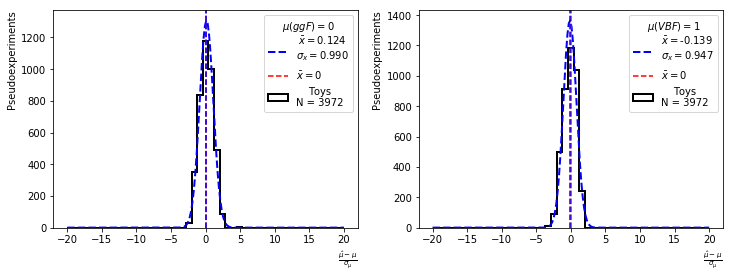

(1, 1)


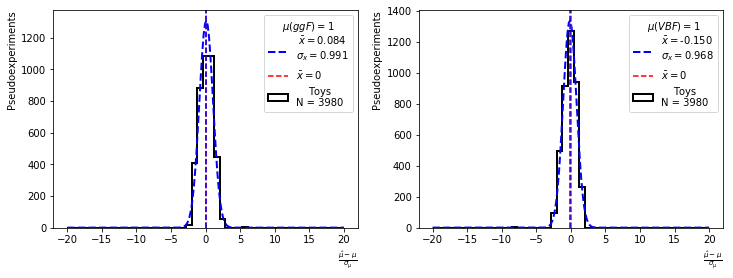

(5, 1)


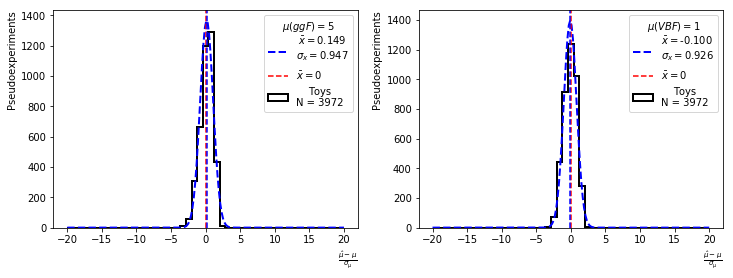

(10, 1)


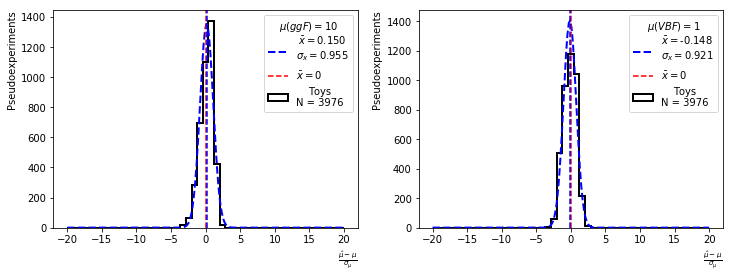

(15, 1)


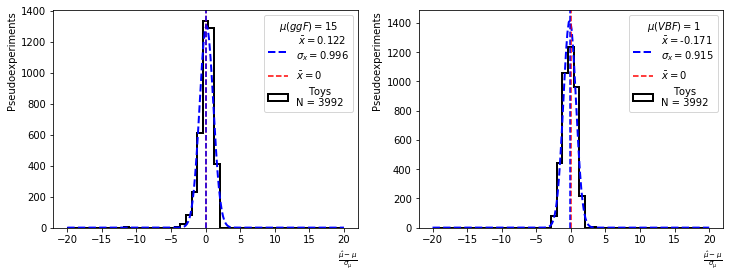

(20, 1)


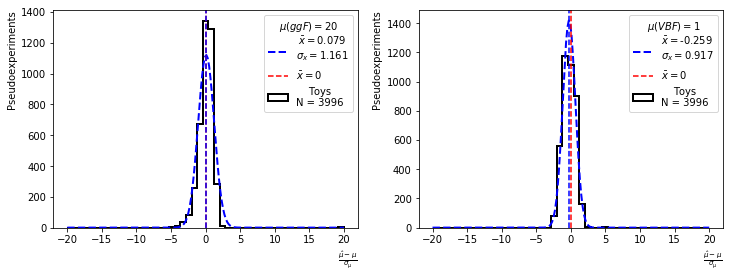

(25, 1)


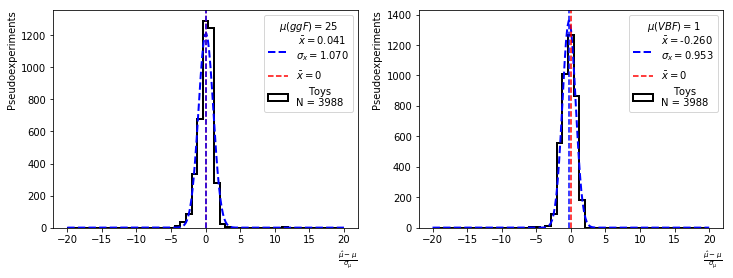

In [4]:
proc = "ggF"
for mu in [0,1,5,10,15,20,25]:
    draw_bias(proc,mu)

(1, 0)


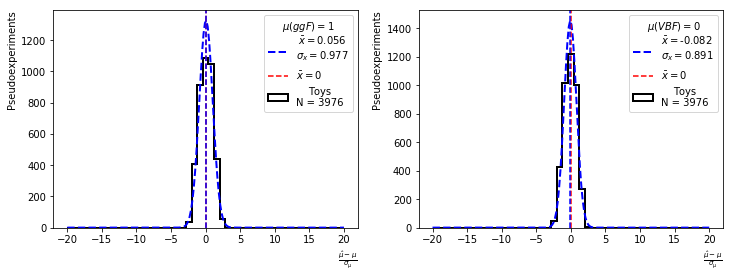

(1, 1)


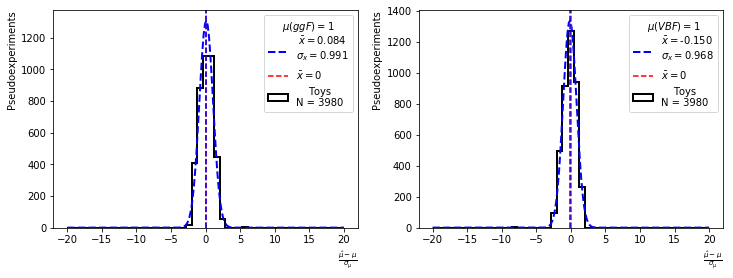

(1, 5)


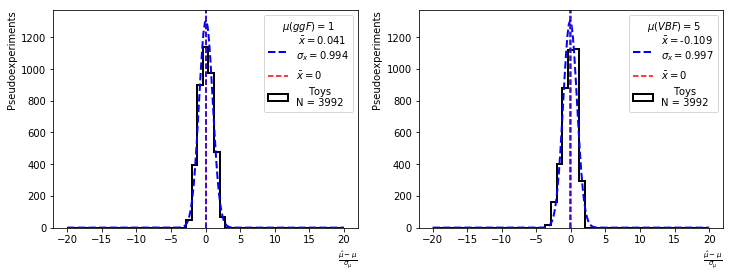

(1, 10)


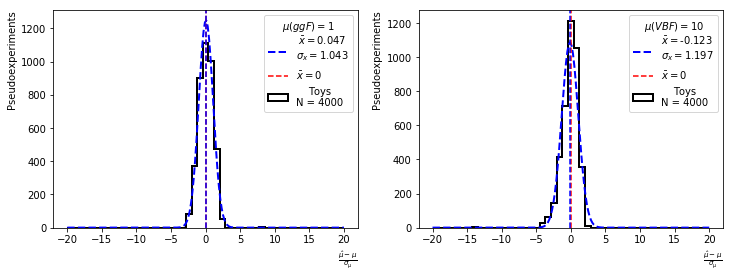

(1, 15)


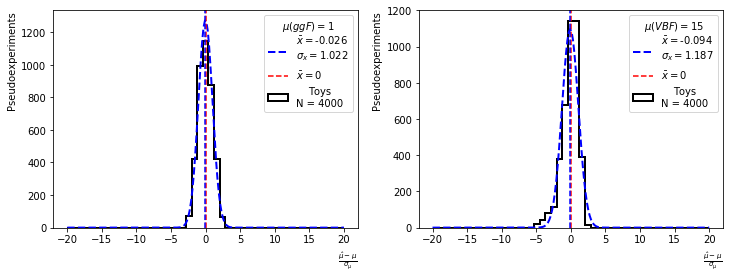

(1, 20)


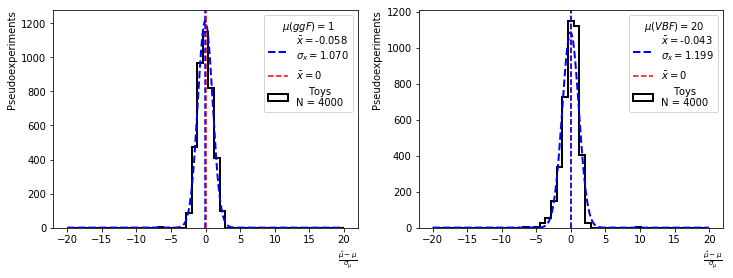

(1, 25)


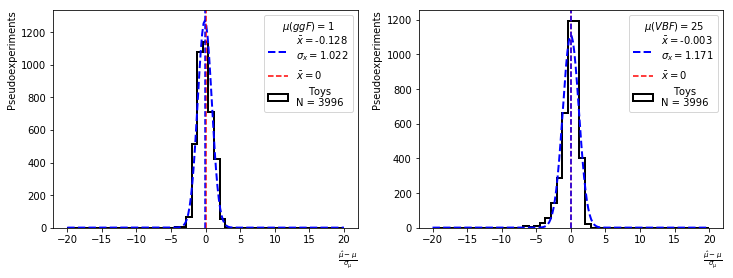

In [5]:
proc = "VBF"
for mu in [0,1,5,10,15,20,25]:
    draw_bias(proc,mu)